<a href="https://colab.research.google.com/github/dAn-solution/competition/blob/main/Prob_kiva_010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kiva／クラウドファンディングの資金調達額予測
- PCAを実施する　以下の4種類
- csvデータのエンコードした8項目
- tagデータからの60項目
- BERTで作成したベクトルデータ64項目
- BERTで作成したベクトルデータ64項目(018)
- PCAの各要素は寄与率80％を超える項目数にする

### Google Driveのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'

Mounted at /content/drive
/content/drive/My Drive


### ライブラリのインストール、インポート

In [ ]:
# カレントディレクトリを変更
import os
os.chdir('/content/drive/My Drive/Probdata/kiva/')
print(os.getcwd())

/content/drive/My Drive/Probdata/kiva


In [ ]:
class Config():
    root_path = './'
    input_path = os.path.join(root_path, 'input')
    output_path = os.path.join(root_path, 'output')
    result_path = os.path.join(root_path, 'result')
    bert_model_name = 'bert-base-uncased'
    seed = 42
    debug = False

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing

from sklearn.decomposition import PCA

### データの読み込み

In [ ]:
train_df = pd.read_csv(f'{Config.input_path}/train.csv')
test_df = pd.read_csv(f'{Config.input_path}/test.csv')
train_bert_df = pd.read_csv(f'{Config.result_path}/train_bert_009.csv')
test_bert_df = pd.read_csv(f'{Config.result_path}/test_bert_009.csv')
train_bert_018_df = pd.read_csv(f'{Config.result_path}/train_bert_018.csv')
test_bert_018_df = pd.read_csv(f'{Config.result_path}/test_bert_018.csv')

train_bert_df = train_bert_df.drop('Unnamed: 0', axis=1)
test_bert_df = test_bert_df.drop('Unnamed: 0', axis=1)
train_bert_018_df = train_bert_018_df.drop('Unnamed: 0', axis=1)
test_bert_018_df = test_bert_018_df.drop('Unnamed: 0', axis=1)

## PCAの実行

#### tag項目のPCA

In [ ]:
train_tags_df = train_df['TAGS'].str.get_dummies(sep=',').add_prefix('tag_')
test_tags_df = test_df['TAGS'].str.get_dummies(sep=',').add_prefix('tag_')

In [ ]:
# 各々に無い項目を追加
lack_col = list(set(train_tags_df.columns) - set(test_tags_df.columns))
if len(lack_col) != 0:
    for col in lack_col:
        test_tags_df[col] = [0]*len(test_tags_df)

lack_col = list(set(test_tags_df.columns) - set(train_tags_df.columns))
if len(lack_col) != 0:
    for col in lack_col:
        train_tags_df[col] = [0]*len(train_tags_df)

In [ ]:
train_tags_df.head(1)

,tag_ #Animals,tag_ #Biz Durable Asset,tag_ #Eco-friendly,tag_ #Elderly,tag_ #Fabrics,tag_ #Female Education,tag_ #First Loan,tag_ #Health and Sanitation,tag_ #Job Creator,tag_ #Orphan,tag_ #Parent,tag_ #Refugee,tag_ #Repair Renew Replace,tag_ #Repeat Borrower,tag_ #Schooling,tag_ #Single,tag_ #Single Parent,tag_ #Supporting Family,tag_ #Sustainable Ag,tag_ #Technology,tag_ #Trees,tag_ #US immigrant,tag_ #Unique,tag_ #Vegan,tag_ #Widowed,tag_ #Woman-Owned Business,tag_ user_favorite,tag_ volunteer_like,tag_ volunteer_pick,tag_#Animals,tag_#Biz Durable Asset,tag_#Eco-friendly,tag_#Elderly,tag_#Fabrics,tag_#Female Education,tag_#First Loan,tag_#Health and Sanitation,tag_#Job Creator,tag_#Orphan,tag_#Parent,tag_#Refugee,tag_#Repair Renew Replace,tag_#Repeat Borrower,tag_#Schooling,tag_#Single,tag_#Single Parent,tag_#Supporting Family,tag_#Sustainable Ag,tag_#Technology,tag_#Trees,tag_#US immigrant,tag_#Unique,tag_#Vegan,tag_#Widowed,tag_#Woman-Owned Business,tag_user_favorite,tag_volunteer_like,tag_volunteer_pick,tag_#US Black-Owned Business,tag_ #US Black-Owned Business
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- 寄与率測定

<BarContainer object of 60 artists>

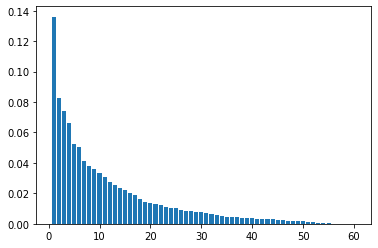

In [ ]:
# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=train_tags_df.shape[1])
pca.fit(train_tags_df)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [ ]:
# 寄与率の確認
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.13605 0.08288 0.07433 0.06617 0.05261 0.0503  0.04107 0.03817 0.0361
 0.03336 0.03098 0.02758 0.02554 0.02356 0.02205 0.02049 0.01922 0.01609
 0.01404 0.01348 0.01276 0.01217 0.01105 0.01038 0.01006 0.00917 0.00861
 0.00838 0.00807 0.00783 0.00707 0.00616 0.00557 0.00486 0.00464 0.00436
 0.00423 0.00404 0.00368 0.00351 0.00343 0.0032  0.00294 0.00283 0.00277
 0.0024  0.00214 0.0021  0.00182 0.0016  0.00137 0.00109 0.00069 0.00039
 0.00024 0.0002  0.00009 0.00004 0.      0.     ]


In [ ]:
# 50%以上の項目数を計算
cnt = 0
pca_tag_cnt = 0
for i in pca.explained_variance_ratio_:
    cnt += i
    pca_tag_cnt += 1
    if cnt > 0.5:
        print(i, cnt, pca_tag_cnt)
        break

0.04107139498499741 0.5034207212554568 7


In [ ]:
#PCA
pca = PCA(n_components=pca_tag_cnt)
train_tags_pca = pca.fit_transform(train_tags_df.values)
test_tags_pca = pca.transform(test_tags_df.values)

#### BERTしたデータのPCA

- 寄与率測定

<BarContainer object of 64 artists>

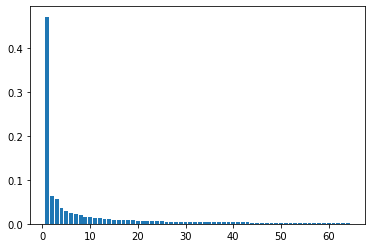

In [ ]:
# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=train_bert_df.shape[1])
pca.fit(train_bert_df)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [ ]:
# 寄与率の確認
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.47211 0.06357 0.05658 0.03545 0.02996 0.02559 0.02195 0.02031 0.01578
 0.01437 0.01352 0.01238 0.01082 0.01011 0.00971 0.00901 0.00824 0.00782
 0.00761 0.00686 0.00668 0.00624 0.0059  0.00586 0.0055  0.00522 0.00498
 0.00487 0.00465 0.00452 0.00441 0.00417 0.00412 0.00392 0.00377 0.00367
 0.00359 0.00336 0.0033  0.00323 0.00313 0.00303 0.00297 0.00293 0.00274
 0.00273 0.00264 0.00261 0.00248 0.00239 0.00235 0.0023  0.00222 0.0022
 0.00212 0.0021  0.00207 0.00203 0.00196 0.00193 0.00189 0.00185 0.00182
 0.00178]


In [ ]:
cnt = 0
pca_bert_cnt = 0
for i in pca.explained_variance_ratio_:
    cnt += i
    pca_bert_cnt += 1
    if cnt > 0.6:
        print(i, cnt, pca_bert_cnt)
        break

0.0354468378679219 0.6277080857091283 4


In [ ]:
#PCA
pca = PCA(n_components=pca_bert_cnt)
train_bert_pca = pca.fit_transform(train_bert_df.values)
test_bert_pca = pca.transform(test_bert_df.values)

#### tags,BERTデータ以外のPCA

In [ ]:
# trainデータを目的変数に分割

train_columns = ["ORIGINAL_LANGUAGE", "ACTIVITY_NAME", "SECTOR_NAME", "COUNTRY_CODE","CURRENCY_POLICY",
       "CURRENCY","REPAYMENT_INTERVAL", "DISTRIBUTION_MODEL"]

train_X = train_df[train_columns]
test_X = test_df[train_columns]

In [ ]:
# 説明変数をラベルエンコーディング
for column in train_X.columns:
  le = preprocessing.LabelEncoder()
  train_target_df = train_X[column]
  test_target_df = test_X[column]  
  le.fit(train_target_df)
  train_label_encoded_df = le.transform(train_target_df)
  test_label_encoded_df = le.transform(test_target_df)
  train_X[column] = pd.Series(train_label_encoded_df).astype("category")
  test_X[column] = pd.Series(test_label_encoded_df).astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


- 寄与率測定

<BarContainer object of 8 artists>

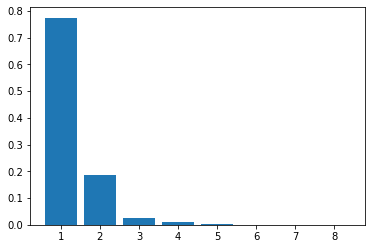

In [ ]:
# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=train_X.shape[1])
pca.fit(train_X)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [ ]:
# 寄与率の確認
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.77424 0.18804 0.02674 0.0095  0.00129 0.00014 0.00004 0.     ]


In [ ]:
cnt = 0
pca_X_cnt = 0
for i in pca.explained_variance_ratio_:
    cnt += i
    pca_X_cnt += 1
    if cnt > 0.8:
        print(i, cnt, pca_X_cnt)
        break

0.18804070728757535 0.9622840200971284 2


In [ ]:
#PCA
pca = PCA(n_components=pca_X_cnt)
train_X_pca = pca.fit_transform(train_X.values)
test_X_pca = pca.transform(test_X.values)

#### BERTしたデータのPCA(018)

<BarContainer object of 64 artists>

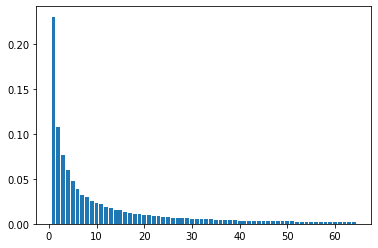

In [ ]:
# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=train_bert_018_df.shape[1])
pca.fit(train_bert_018_df)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [ ]:
# 寄与率の確認
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.23065 0.10832 0.07608 0.06043 0.04814 0.03922 0.0325  0.02979 0.02493
 0.02308 0.02196 0.01889 0.01769 0.01591 0.01488 0.01358 0.01232 0.01115
 0.01051 0.00981 0.00969 0.00892 0.00829 0.00766 0.00727 0.00673 0.00657
 0.0062  0.00606 0.00562 0.00546 0.00529 0.00495 0.00483 0.00465 0.00445
 0.00425 0.00383 0.00379 0.00362 0.00351 0.00344 0.00335 0.00317 0.00311
 0.00301 0.00292 0.00287 0.00276 0.00267 0.00265 0.00253 0.00249 0.00243
 0.00234 0.00229 0.00225 0.00219 0.00211 0.00207 0.002   0.00199 0.00194
 0.00193]


In [ ]:
cnt = 0
pca_bert_cnt = 0
for i in pca.explained_variance_ratio_:
    cnt += i
    pca_bert_cnt += 1
    if cnt > 0.5:
        print(i, cnt, pca_bert_cnt)
        break

0.048144917329223415 0.5236223434551631 5


In [ ]:
#PCA
pca = PCA(n_components=pca_bert_cnt)
train_bert_018_pca = pca.fit_transform(train_bert_018_df.values)
test_bert_018_pca = pca.transform(test_bert_018_df.values)

## PCAデータの出力

In [ ]:
np.save(f'{Config.result_path}/train_tags_pca', train_tags_pca)
np.save(f'{Config.result_path}/test_tags_pca', test_tags_pca)
np.save(f'{Config.result_path}/train_bert_pca', train_bert_pca)
np.save(f'{Config.result_path}/test_bert_pca', test_bert_pca)
np.save(f'{Config.result_path}/train_X_pca', train_X_pca)
np.save(f'{Config.result_path}/test_X_pca', test_X_pca)

In [ ]:
np.save(f'{Config.result_path}/train_bert_018_pca', train_bert_018_pca)
np.save(f'{Config.result_path}/test_bert_018_pca', test_bert_018_pca)